In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

df = pd.read_csv("students_10000.csv")

print("==== HEAD ====")
print(df.head())
print("\n==== SHAPE ====")
print(df.shape)
print("\n==== INFO ====")
print(df.info())
print("\n==== MISSING VALUES ====")
print(df.isnull().sum())

==== HEAD ====
  student_id first_name  last_name  gender         dob  age  grade section  \
0    S000001     Fatima    Hossain  Female  2010-06-30   15      3       A   
1    S000002     Raihan       Banu    Male  2005-02-23   20     12       D   
2    S000003    Moumita  Chowdhury   Other  2013-06-28   12      9       C   
3    S000004     Nusrat      Hasan    Male  2010-12-28   14      2       B   
4    S000005    Tasnima     Sarkar  Female  2017-09-21    8      4       D   

   roll_no                          email       phone  \
0        1     fatima.hossain1@school.edu  1819600133   
1        2        raihan.banu2@school.edu  1542351161   
2        3  moumita.chowdhury3@school.edu  1959310341   
3        4       nusrat.hasan4@school.edu  1832764835   
4        5     tasnima.sarkar5@school.edu  1672423884   

                           address        city                state  \
0        House 215, Road 57, Dhaka       Dhaka      Sylhet Division   
1     House 374, Road 118, Rang

In [5]:
df.head()

,student_id,first_name,last_name,gender,dob,age,grade,section,roll_no,email,phone,address,city,state,country,gpa,enrollment_date
0,S000001,Fatima,Hossain,Female,2010-06-30,15,3,A,1,fatima.hossain1@school.edu,1819600133,"House 215, Road 57, Dhaka",Dhaka,Sylhet Division,Bangladesh,2.60,2022-04-15
1,S000002,Raihan,Banu,Male,2005-02-23,20,12,D,2,raihan.banu2@school.edu,1542351161,"House 374, Road 118, Rangpur",Rangpur,Mymensingh Division,Bangladesh,3.03,2017-12-19
2,S000003,Moumita,Chowdhury,Other,2013-06-28,12,9,C,3,moumita.chowdhury3@school.edu,1959310341,"House 326, Road 94, Barishal",Barishal,Mymensingh Division,Bangladesh,2.30,2018-02-12
3,S000004,Nusrat,Hasan,Male,2010-12-28,14,2,B,4,nusrat.hasan4@school.edu,1832764835,"House 206, Road 69, Dhaka",Dhaka,Chattogram Division,Bangladesh,4.47,2024-01-11
4,S000005,Tasnima,Sarkar,Female,2017-09-21,8,4,D,5,tasnima.sarkar5@school.edu,1672423884,"House 261, Road 127, Mymensingh",Mymensingh,Sylhet Division,Bangladesh,3.20,2017-06-17



Target distribution for 'high_gpa':
high_gpa
1    5061
0    4939
Name: count, dtype: int64


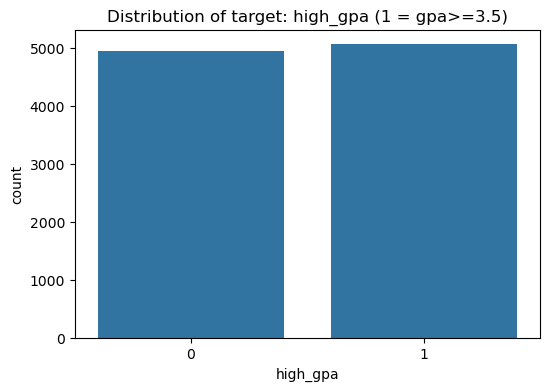

In [3]:

df['high_gpa'] = (df['gpa'] >= 3.5).astype(int)
target_col = 'high_gpa'

print(f"\nTarget distribution for '{target_col}':")
print(df[target_col].value_counts())

# Plot: target countplot
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Distribution of target: high_gpa (1 = gpa>=3.5)")
plt.xlabel("high_gpa")
plt.ylabel("count")
plt.show()


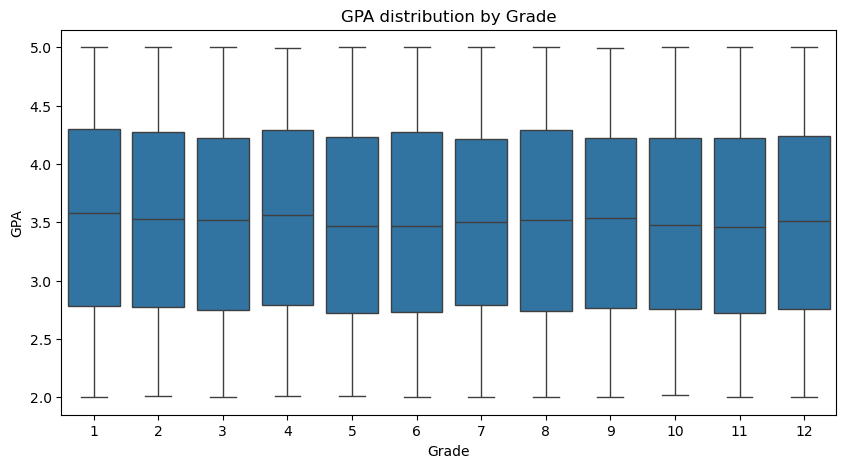

In [4]:

plt.figure(figsize=(10,5))
sns.boxplot(x='grade', y='gpa', data=df)
plt.title("GPA distribution by Grade")
plt.xlabel("Grade")
plt.ylabel("GPA")
plt.show()

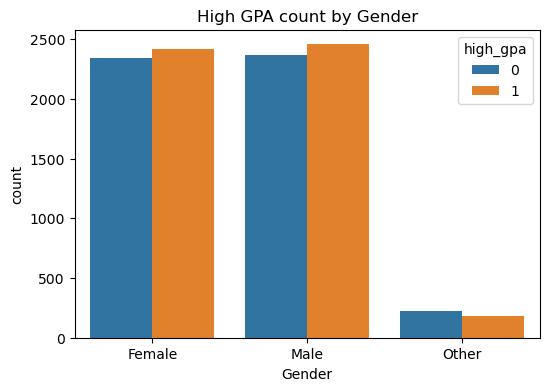

In [5]:
# 2) Countplot: high_gpa by gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue=target_col, data=df)
plt.title("High GPA count by Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.legend(title='high_gpa')
plt.show()

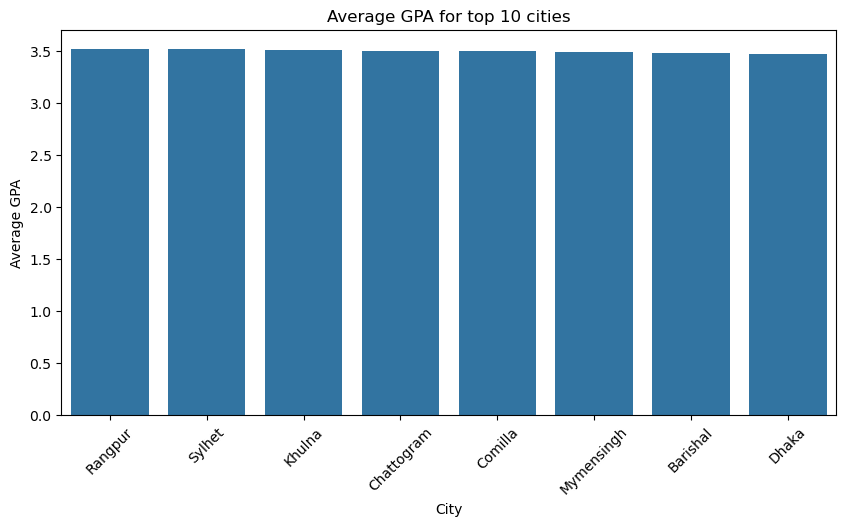

In [6]:
# 3) Barplot: average GPA by city (top 10 cities by count)
top_cities = df['city'].value_counts().nlargest(10).index
avg_gpa_by_city = df[df['city'].isin(top_cities)].groupby('city')['gpa'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_gpa_by_city.index, y=avg_gpa_by_city.values)
plt.title("Average GPA for top 10 cities")
plt.xlabel("City")
plt.ylabel("Average GPA")
plt.xticks(rotation=45)
plt.show()

In [7]:

y = df[target_col]



drop_cols = ['student_id', 'email', 'phone', 'address', 'dob', 'enrollment_date', target_col]


X = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)



Numerical columns: ['age', 'grade', 'roll_no', 'gpa']
Categorical columns: ['first_name', 'last_name', 'gender', 'section', 'city', 'state', 'country']


In [8]:
# Build ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)


In [9]:
# 5. ট্রেন-টেস্ট স্প্লিট (80/20) with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

print("\nShapes after split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))



Shapes after split:
X_train: (8000, 11) X_test: (2000, 11)
y_train distribution:
 high_gpa
1    0.506125
0    0.493875
Name: proportion, dtype: float64
y_test distribution:
 high_gpa
1    0.506
0    0.494
Name: proportion, dtype: float64


In [10]:
# 6. মডেল তৈরি ও ট্রেনিং (Pipeline)
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1))
])


In [11]:
# Fit the model
print("\nTraining the model...")
clf.fit(X_train, y_train)
print("Training completed.")



Training the model...
Training completed.


In [12]:
# 7. মডেল মূল্যায়ন
print("\nPredicting on test set...")
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))



Predicting on test set...

Accuracy on test set: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       988
           1     1.0000    1.0000    1.0000      1012

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000

